# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [ ]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
## file_1 =

In [ ]:
## TODO : make into a dataframe called df
## df =

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
## TODO : output the first 5 lines


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively


In [5]:
#unique values of exited
df['Exited'].unique()

array([1, 0])

In [6]:
df_1 = df[df['Exited'] == 1]
df_0 = df[df['Exited'] == 0]

## Hypothesis 1: Age

In [ ]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

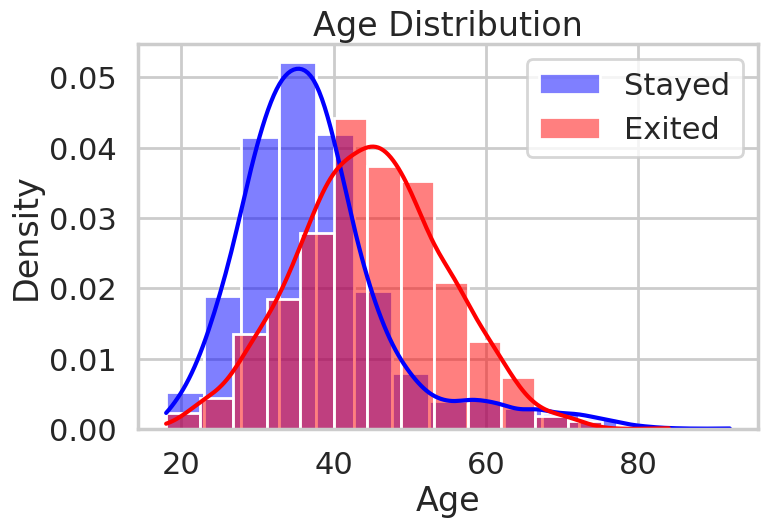

In [7]:
sns.histplot(df_0['Age'], color='blue', label='Stayed', kde=True, stat="density", bins=15)
sns.histplot(df_1['Age'], color='red', label='Exited', kde=True, stat="density", bins=15)
plt.legend()
plt.title('Age Distribution')
plt.show()

# **The blue represents distribution of age from clients who stayed in the bank, while the red represents distribution of age of the clients who left. We can see the age can influence the decision of staying or not in the bank, because the distribution of both are different.**

In [ ]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.

In [ ]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.

In [10]:
#customers who stayed
mean_age_stayed = df_0['Age'].mean()
std_age_stayed = df_0['Age'].std()

#customers who left
mean_age_left = df_1['Age'].mean()
std_age_left = df_1['Age'].std()

mean_age_stayed, std_age_stayed, mean_age_left, std_age_left


(37.40838879819164, 10.125362911047631, 44.8379970544919, 9.761561555507132)

# **With the mean and also the plot of age distribution we can see age can affect the decision of clients to leave or stay**

In [ ]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.

In [9]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_0['Age'], df_1['Age'], equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -30.419197204406792, P-value: 4.7127272656641046e-179


# **A negative value indicates that the mean CreditScore of customers who churned (Exited = 1) is lower than that of customers who stayed (Exited = 0). 30.42 is very high, meaning a very strong difference between the two groups.**

### Using Bootstrapping

In [ ]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s =
    for i in range(size):
        bs_abc =
        bs_s[i] = func(bs_abc)
    return bs_s

In [ ]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.

In [12]:
mean_diff = df_1['Age'].mean() - df_0['Age'].mean()

combined_mean = df['Age'].mean()
df_0_shifted = df_0['Age'] - df_0['Age'].mean() + combined_mean
df_1_shifted = df_1['Age'] - df_1['Age'].mean() + combined_mean

print(mean_diff)
print(df_0_shifted)
print(df_1_shifted)

7.429608256300263
1       42.513411
3       40.513411
4       44.513411
6       51.513411
8       45.513411
          ...    
9993    29.513411
9994    30.513411
9995    40.513411
9996    36.513411
9999    29.513411
Name: Age, Length: 7963, dtype: float64
0       36.083803
2       36.083803
5       38.083803
7       23.083803
16      52.083803
          ...    
9981    36.083803
9982    40.083803
9991    47.083803
9997    30.083803
9998    36.083803
Name: Age, Length: 2037, dtype: float64


In [ ]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.

In [15]:
def bootstrap(data1, data2, func, n_bootstrap=10000):
    boot_diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        boot_diffs.append(func(sample2) - func(sample1))
    return np.array(boot_diffs)

bootstrap_diffs = bootstrap(df_0_shifted, df_1_shifted, np.mean)
def bootstrap(data1, data2, func, n_bootstrap=10000):
    boot_diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        boot_diffs.append(func(sample2) - func(sample1))
    return np.array(boot_diffs)

bootstrap_diffs = bootstrap(df_0_shifted, df_1_shifted, np.mean)

print(f"Mean difference: {np.mean(bootstrap_diffs)}")
print(f"Standard deviation: {np.std(bootstrap_diffs)}")

Mean difference: -0.002350500661788581
Standard deviation: 0.2418334476692869


## **The difference between groups is very small. The higher the Standard deviation, the more uncertain we are about the difference between groups**

In [ ]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.

In [18]:
p_value = (np.sum(bootstrap_diffs >= mean_diff) + 1) / (len(bootstrap_diffs) + 1)
print(p_value)

9.999000099990002e-05


# **the age distributions are significantly different between customers who left and those who stayed**

### Conclusion
Do we reject the Null Hypothesis ? Why ?

# **We see a very low p-value (close to 0), and this indicates strong evidence against the null hypothesis. The age are significally different**

## Hypothesis 2: Credit Score

In [ ]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).

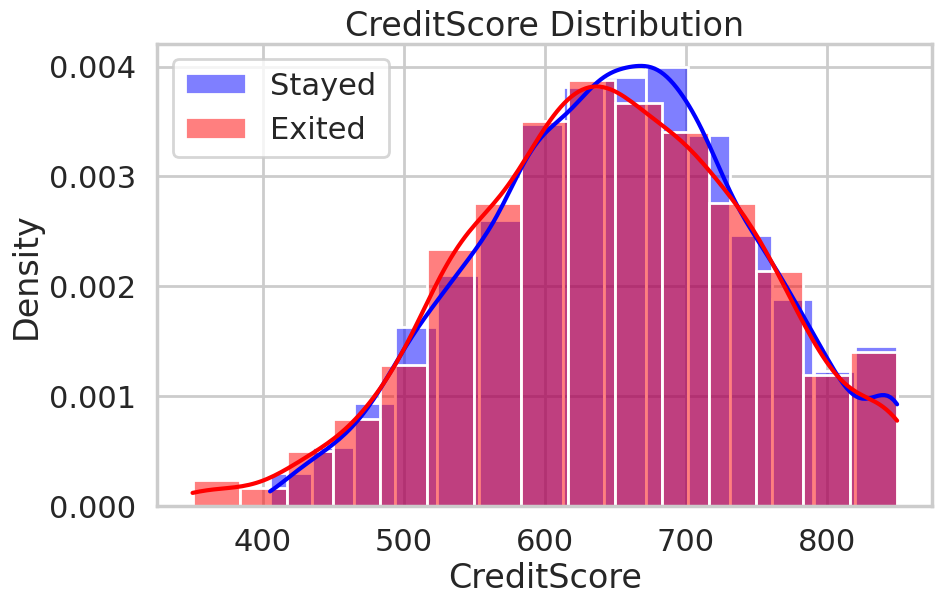

In [31]:
plt.figure(figsize=(10, 6))

sns.histplot(df_0['CreditScore'], color='blue', label='Stayed', kde=True, stat="density", bins=15)

sns.histplot(df_1['CreditScore'], color='red', label='Exited', kde=True, stat="density", bins=15)

plt.legend()
plt.title('CreditScore Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Density')
plt.show()


In [ ]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).

In [32]:
t_stat, p_value = ttest_ind(df_0['CreditScore'], df_1['CreditScore'])

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("reject null hypothesis. there is significant difference between groups")
else:
    print("Fail to reject null hypothesis. No evidence of dignificant difference")


T-statistic: 2.7100778888729833
P-value: 0.006738213892192373
reject null hypothesis. there is significant difference between groups


### Conclusion
Do we reject the Null Hypothesis ? Why ?

# **Since the P-value is below the 0.05 threshold, we reject the Null Hypothesis. This means that there is enough evidence to suggest a statistically significant difference in the CreditScore between the two groups.**

## Hypothesis 3: Balance

In [ ]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).

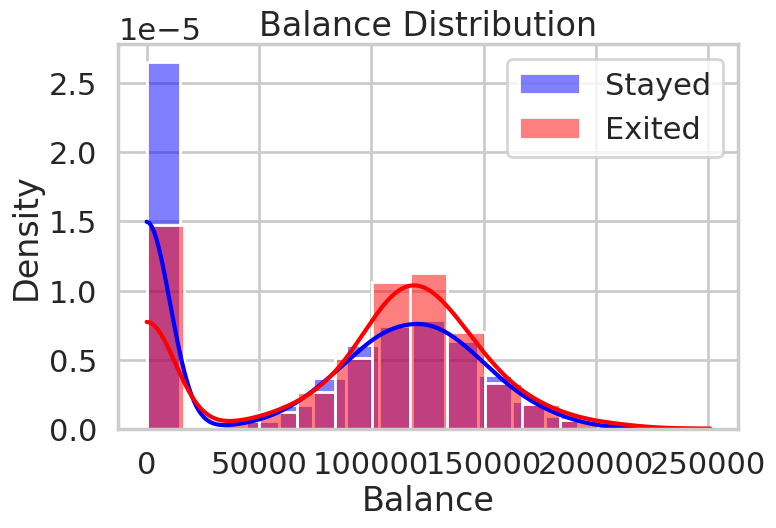

In [19]:
sns.histplot(df_0['Balance'], color='blue', label='Stayed', kde=True, stat="density", bins=15)
sns.histplot(df_1['Balance'], color='red', label='Exited', kde=True, stat="density", bins=15)
plt.legend()
plt.title('Balance Distribution')
plt.show()

In [ ]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.

In [20]:
t_stat, p_value = ttest_ind(df_0['Balance'], df_1['Balance'], equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -12.471280320050688, P-value: 6.318663518527974e-35


# **The very small p-value (much less than 0.05) indicates strong evidence against the null hypothesis. This means there is a significant difference in the balance of customers who stayed with the bank and those who left. We reject the null hypothesis and conclude that the balance distributions are not similar for the two groups.**

In [ ]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.

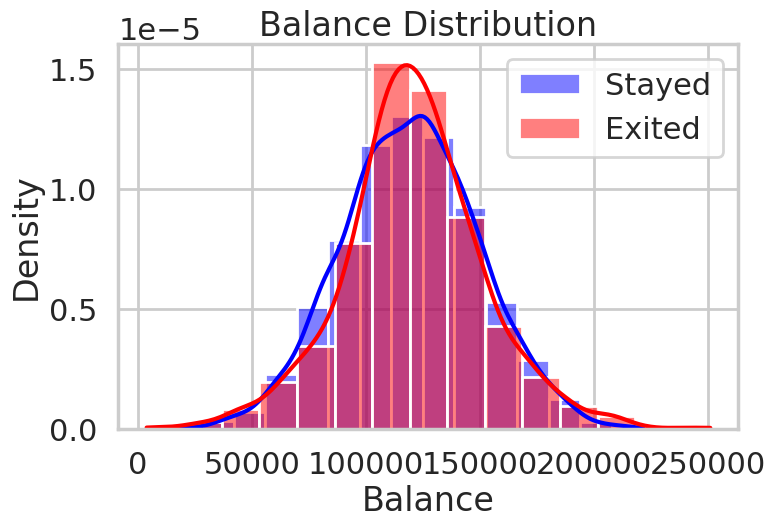

In [22]:
df_0_non_zero = df_0[df_0['Balance'] > 0]
df_1_non_zero = df_1[df_1['Balance'] > 0]

sns.histplot(df_0_non_zero['Balance'], color='blue', label='Stayed', kde=True, stat="density", bins=15)
sns.histplot(df_1_non_zero['Balance'], color='red', label='Exited', kde=True, stat="density", bins=15)
plt.legend()
plt.title('Balance Distribution')
plt.show()

In [ ]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.

In [23]:
t_stat_non_zero, p_value_non_zero = ttest_ind(df_0_non_zero['Balance'], df_1_non_zero['Balance'], equal_var=False)
print(f"T-statistic (Non-Zero): {t_stat_non_zero}, P-value (Non-Zero): {p_value_non_zero}")

T-statistic (Non-Zero): -1.3604774889985365, P-value (Non-Zero): 0.17379960354870824


# **In this case, the p-value is much greater than 0.05, indicating that we fail to reject the null hypothesis. The balance distributions between customers who stayed and those who left are not significantly different when excluding the zero balances. for customers with non-zero balances, the difference in balance is not statistically significant.**

## Conclusion

Do we reject the Null Hypothesis ? Why ?

# **We reject the null hypothesis for the overall balance distribution (including zero balances) because the p-value is very small, indicating a significant difference. However, we fail to reject the null hypothesis when excluding zero balances, indicating no significant difference in balance between the two groups in that case.**

## Hypothesis 4: Estimated Salary

In [ ]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.

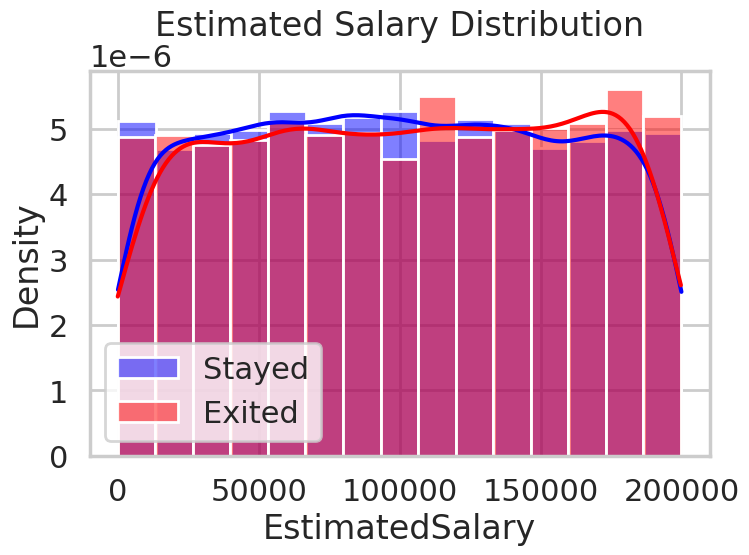

In [24]:
sns.histplot(df_0['EstimatedSalary'], color='blue', label='Stayed', kde=True, stat="density", bins=15)
sns.histplot(df_1['EstimatedSalary'], color='red', label='Exited', kde=True, stat="density", bins=15)
plt.legend()
plt.title('Estimated Salary Distribution')
plt.show()

# **The salary distribution is pretty similar, so we can say this is not something that affect the desicion of clients of staying or not**

In [ ]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.

In [25]:
t_stat_salary, p_value_salary = ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'], equal_var=False)
print(f"T-statistic (Salary): {t_stat_salary}, P-value (Salary): {p_value_salary}")

T-statistic (Salary): -1.2033683196586242, P-value (Salary): 0.22892461305145795


# **The p-value (0.229) is more than 0.05, which means that we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in the estimated salary between customers who stayed with the bank and those who left.We also saw it in the plot before**

# Using Bootstrapping

In [ ]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.

In [30]:
mean_diff_salary = df_1['EstimatedSalary'].mean() - df_0['EstimatedSalary'].mean()

combined_mean_salary = df['EstimatedSalary'].mean()
df_0_shifted_salary = df_0['EstimatedSalary'] - df_0['EstimatedSalary'].mean() + combined_mean_salary
df_1_shifted_salary = df_1['EstimatedSalary'] - df_1['EstimatedSalary'].mean() + combined_mean_salary

print(f"Mean Difference in Estimated Salary: {mean_diff_salary}")


Mean Difference in Estimated Salary: 1727.2857587371254


In [ ]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.

In [29]:
def bootstrap(data1, data2, func, n_bootstrap=10000):
    boot_diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        boot_diffs.append(func(sample2) - func(sample1))  # Calculamos la diferencia de medias
    return np.array(boot_diffs)

bootstrap_diffs_salary = bootstrap(df_0['EstimatedSalary'], df_1['EstimatedSalary'], np.mean)

print(f"Bootstrap Mean Difference: {np.mean(bootstrap_diffs_salary)}")
print(f"Bootstrap Standard Deviation: {np.std(bootstrap_diffs_salary)}")


Bootstrap Mean Difference: 1732.1900130754084
Bootstrap Standard Deviation: 1434.7313708542333


# **The boostrap mean is telling us that on average, the difference of salary between both groups is around 1732. The standard deviation is pretty high so we are not certain about accuracy in that difference**

In [ ]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.

In [28]:
p_value_bootstrap_salary = (np.sum(bootstrap_diffs_salary >= np.mean(df_0['EstimatedSalary']) - np.mean(df_1['EstimatedSalary'])) + 1) / (len(bootstrap_diffs_salary) + 1)
print(f"P-value (Bootstrap): {p_value_bootstrap_salary}")

P-value (Bootstrap): 0.9912008799120088


### Conclusion
Do we reject the Null Hypothesis ? Why ?

# **The p value is very higher than 0.05, so we dont reject null hypothesis. This means there is no enough evidence to conclude that the difference of salary between groups is significant**

## Final Conclusion
What will be the most helpful feature in predicting churning?


#
Hypothesis 1: Age
 age does play a role in customer churn. The p-value was very small, indicating a strong difference in age distributions.
Hypothesis 2: Credit Score
rejected the null hypothesis, indicating a significant difference in credit scores between customers who stayed and those who left.
Hypothesis 3: Balance
rejected the null hypothesis for the overall balance distribution but failed to reject it when zero balances were excluded. This suggests that the balance distributions are significantly different when considering all customers, but the non-zero balances don't show a significant difference between the two groups.
Hypothesis 4: Estimated Salary
the salary distributions seemed quite similar, suggesting that salary might not significantly influence whether a customer stays or leaves.

With this we can say the features that can help predict the most if clients are staying or not are: Age and CreditScore